In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.metrics import classification_report, roc_curve, auc

In [4]:
# Set Work Path
import os
path="C:/Users/zelic/Downloads/04.추가특허출원대상/fw"
os.chdir(path)

In [5]:
# Load Train Test Files
df_X_train = pd.read_pickle('df_X_train.pkl')
df_y_train = pd.read_pickle('df_y_train.pkl')
df_X_train['bias'] = 1

df_X_valid = pd.read_pickle('df_X_valid.pkl')
df_y_valid = pd.read_pickle('df_y_valid.pkl')
df_X_valid['bias'] = 1

In [6]:
df_X_train = np.array(df_X_train)
df_y_train = np.array(df_y_train)

In [9]:
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [10]:
num_vars = len(df_X_valid.columns)
print(num_vars)

536


In [11]:
# Set Optimizer
from keras.optimizers import Adam
optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

c:\ProgramData\Anaconda3\envs\patent\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [14]:
# Create Model
model = Sequential()
model.add(Dense(num_vars, input_dim=num_vars, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_vars, input_dim=num_vars, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_vars, input_dim=num_vars, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

# Compile Model
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['acc'])

# Checkpoint
filepath = "best_model_dropout30.h5"
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)
checkpoint_callback = ModelCheckpoint(filepath, monitor = 'val_loss', verbose = 1,
                                      save_best_only = True, mode = 'min')

# Run Model
#hist = model.fit(df_X_train, df_y_train, epochs = 10000, batch_size = 256, validation_split = 0.5,
#                 callbacks = [early_stopping_callback, checkpoint_callback])
hist = model.fit(df_X_train, df_y_train, epochs = 10, batch_size = 256, validation_split = 0.5,
                 callbacks = [early_stopping_callback, checkpoint_callback])

Epoch 1/10
1178/1179 [============================>.] - ETA: 0s - loss: 0.2390 - acc: 0.9276
Epoch 1: val_loss improved from inf to 0.23152, saving model to best_model_dropout30.h5
1179/1179 [==============================] - 38s 32ms/step - loss: 0.2390 - acc: 0.9276 - val_loss: 0.2315 - val_acc: 0.9277
Epoch 2/10
1179/1179 [==============================] - ETA: 0s - loss: 0.2276 - acc: 0.9282
Epoch 2: val_loss improved from 0.23152 to 0.22723, saving model to best_model_dropout30.h5
1179/1179 [==============================] - 39s 33ms/step - loss: 0.2276 - acc: 0.9282 - val_loss: 0.2272 - val_acc: 0.9277
Epoch 3/10
1177/1179 [============================>.] - ETA: 0s - loss: 0.2226 - acc: 0.9282
Epoch 3: val_loss improved from 0.22723 to 0.22503, saving model to best_model_dropout30.h5
1179/1179 [==============================] - 32s 27ms/step - loss: 0.2226 - acc: 0.9282 - val_loss: 0.2250 - val_acc: 0.9277
Epoch 4/10
1177/1179 [============================>.] - ETA: 0s - loss: 0.

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 536)               287832    
                                                                 
 dropout_6 (Dropout)         (None, 536)               0         
                                                                 
 dense_9 (Dense)             (None, 536)               287832    
                                                                 
 dropout_7 (Dropout)         (None, 536)               0         
                                                                 
 dense_10 (Dense)            (None, 536)               287832    
                                                                 
 dropout_8 (Dropout)         (None, 536)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                

In [16]:
# Save Model Architecture
with open('model_architecture.json', 'w') as f:
    f.write(model.to_json())

In [17]:
from keras.models import model_from_json

# load json and create model
json_file = open('model_architecture.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("best_model_dropout30.h5")
print("Loaded model from disk")

Loaded model from disk


In [18]:
loaded_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 536)               287832    
                                                                 
 dropout_6 (Dropout)         (None, 536)               0         
                                                                 
 dense_9 (Dense)             (None, 536)               287832    
                                                                 
 dropout_7 (Dropout)         (None, 536)               0         
                                                                 
 dense_10 (Dense)            (None, 536)               287832    
                                                                 
 dropout_8 (Dropout)         (None, 536)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                

<Figure size 1200x800 with 0 Axes>

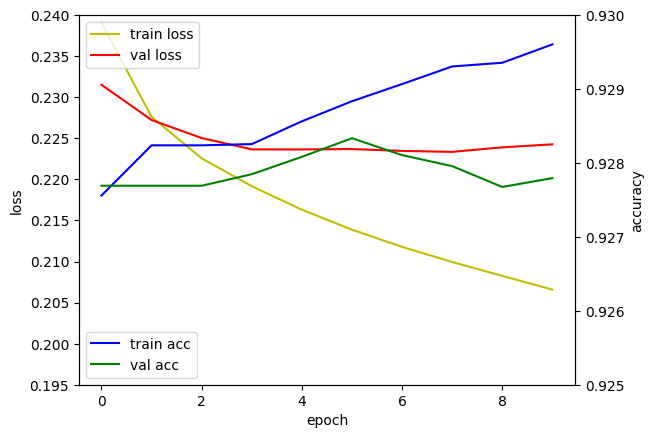

<Figure size 1200x800 with 0 Axes>

590/590 [==============================] - 6s 8ms/step - loss: 0.2240 - acc: 0.9280
loss_and_metrics: [0.22397677600383759, 0.9280037879943848]


In [20]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(12, 8))
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.195,0.24])
acc_ax.set_ylim([0.925,0.93])

loss_ax.plot(hist.history['loss'], 'y', label = 'train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label = 'val loss')

acc_ax.plot(hist.history['acc'], 'b', label = 'train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label = 'val acc')


loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.figure(figsize = (12,8))

plt.show()

loss_and_metrics = model.evaluate(df_X_valid, df_y_valid, batch_size = 256)
print('loss_and_metrics: ' + str(loss_and_metrics))

18859/18859 [==============================] - 75s 4ms/step
0.46648382977661923


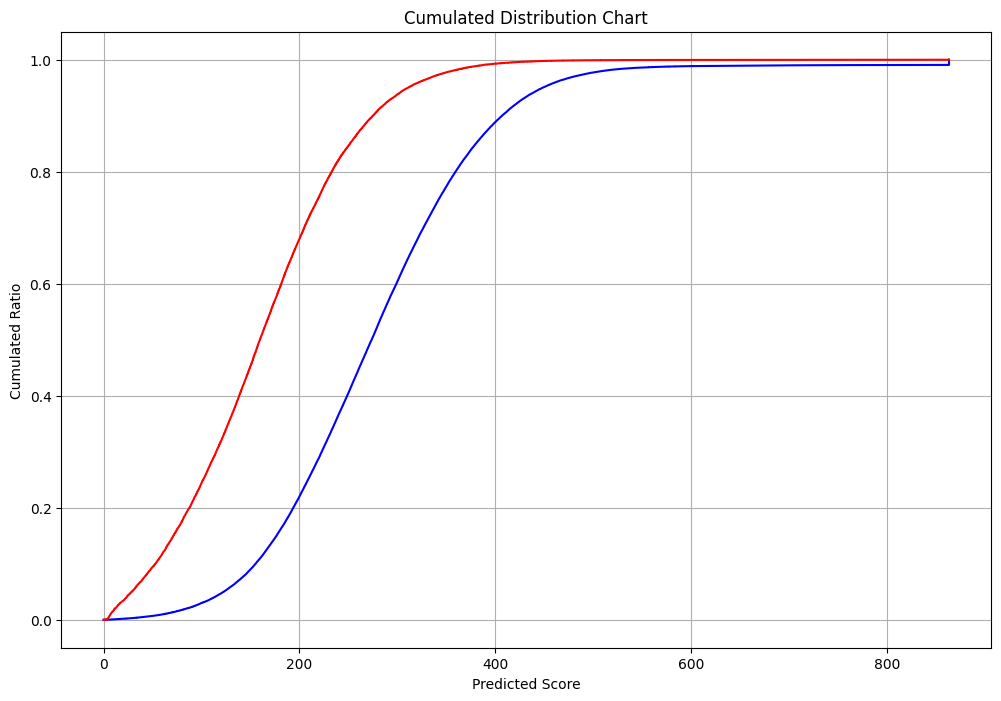

In [21]:
# K-S Statistics for Training Data
result_train = pd.DataFrame(df_y_train, columns = {'delayed'})
result_train['normal'] = 1 - result_train['delayed']
result_train['normal_prob'] = 1 - loaded_model.predict(df_X_train)
result_train['delayed_prob'] = 1 - result_train['normal_prob']

result_train['predict'] = [1 if x >= 0.5 else 0 for x in result_train['delayed_prob']]

result_train['normal_prob'] = [0.99999 if x >= 0.99999 else x for x in result_train['normal_prob']]
result_train['normal_prob'] = [0.00001 if x <= 0.00001 else x for x in result_train['normal_prob']]
result_train['delayed_prob'] = [0.99999 if x >= 0.99999 else x for x in result_train['delayed_prob']]
result_train['delayed_prob'] = [0.00001 if x <= 0.00001 else x for x in result_train['delayed_prob']]

result_train['odds'] = result_train['normal_prob'] / result_train['delayed_prob']
result_train.sort_values(by = 'delayed_prob', ascending = False, inplace = True)
result_train = result_train.reset_index(drop = True)
pdo = 50
result_train['score_temp'] = pdo / np.log(2) * np.log(result_train['odds'])
result_train_min_score = np.min(result_train['score_temp'])
result_train['score'] = result_train['score_temp'] - result_train_min_score
result_train.head()
result_train['normal_cusum'] = result_train['normal'].cumsum()
result_train['delayed_cusum'] = result_train['delayed'].cumsum()
result_train_max_normal_cumsum = np.max(result_train['normal_cusum'])
result_train_max_delayed_cumsum = np.max(result_train['delayed_cusum'])

result_train['normal_cusum_ratio'] = result_train['normal_cusum'] / result_train_max_normal_cumsum
result_train['delayed_cusum_ratio'] = result_train['delayed_cusum'] / result_train_max_delayed_cumsum
result_train['diff_cusum_ratio'] = result_train['delayed_cusum_ratio'] - result_train['normal_cusum_ratio'] 

print(np.max(abs(result_train['diff_cusum_ratio'])))

plt.figure(figsize=(12, 8))
plt.rcParams['axes.grid'] = True
plt.xlabel('Predicted Score')
plt.ylabel('Cumulated Ratio')
plt.title('Cumulated Distribution Chart')
plt.plot(result_train['score'], result_train['normal_cusum_ratio'], color = 'b')
plt.plot(result_train['score'], result_train['delayed_cusum_ratio'], color = 'r')
plt.show()

              precision    recall  f1-score   support

           0       0.93      1.00      0.96    560002
           1       0.57      0.06      0.11     43471

    accuracy                           0.93    603473
   macro avg       0.75      0.53      0.53    603473
weighted avg       0.91      0.93      0.90    603473

0.8103356144572987


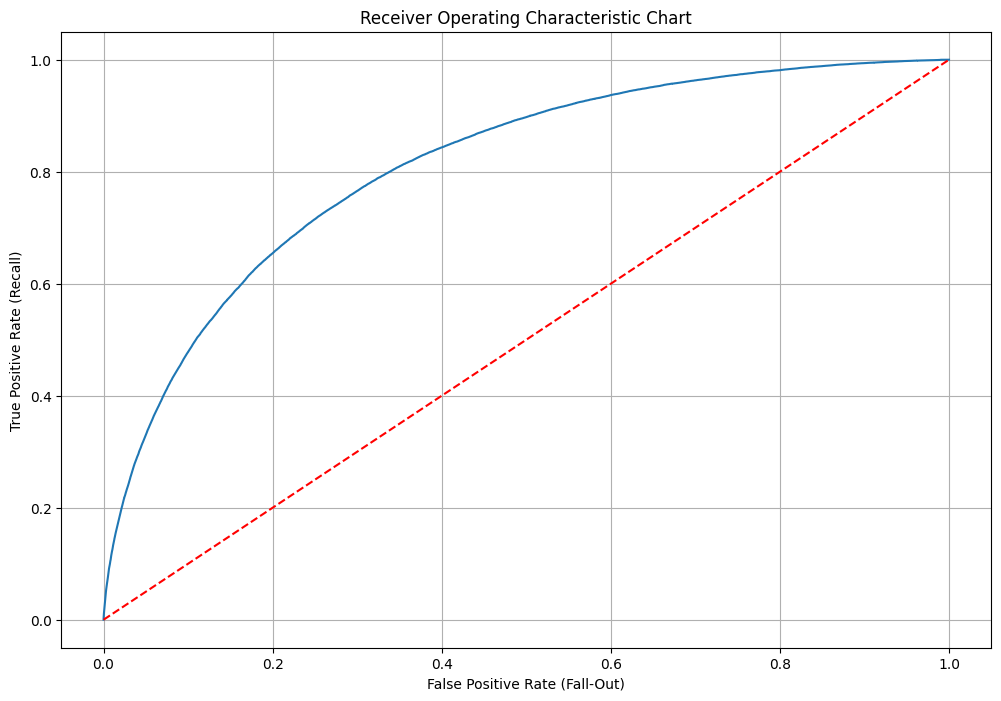

In [22]:
print(classification_report(result_train['delayed'], result_train['predict']))

fpr, tpr, thresholds = roc_curve(result_train['delayed'], result_train['delayed_prob'])

print(auc(fpr, tpr))


plt.figure(figsize=(12, 8))

plt.plot(fpr, tpr)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])


plt.plot([0, 1], [0, 1], 'r--', label="random guess")


plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic Chart')
plt.savefig('ROC_Curve')
plt.show()

4715/4715 [==============================] - 20s 4ms/step
0.41346218307282473


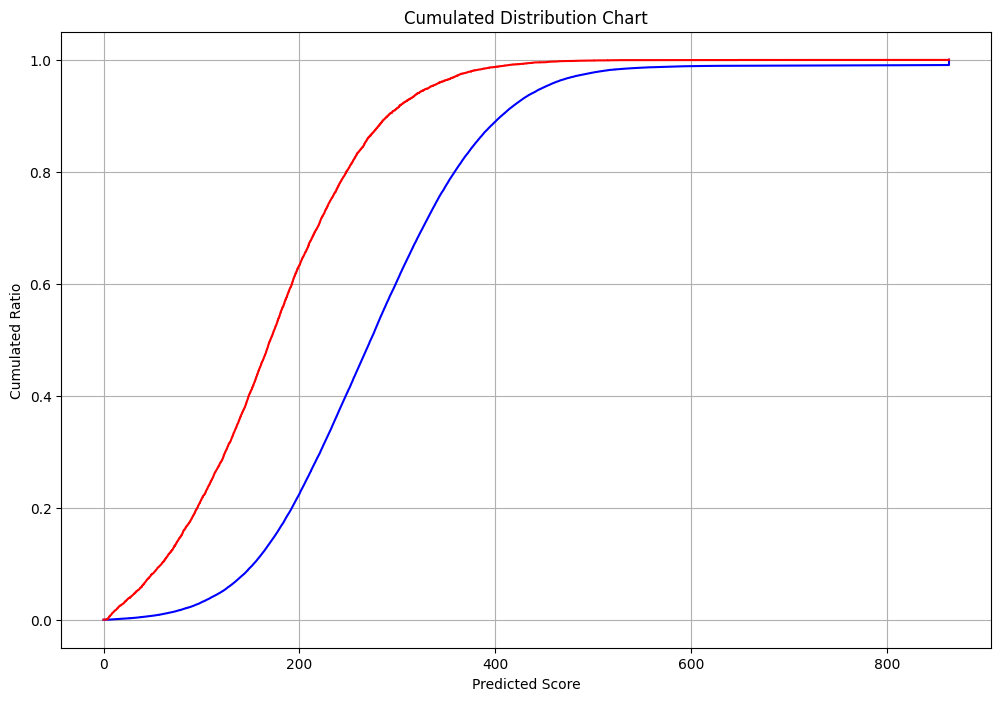

In [23]:
# K-S Statistics for Validation Data

result_valid = pd.DataFrame(df_y_valid, columns = {'delayed'})
result_valid['normal'] = 1 - result_valid['delayed']
result_valid['normal_prob'] = 1 - loaded_model.predict(df_X_valid)
result_valid['delayed_prob'] = 1 - result_valid['normal_prob']

result_valid['predict'] = [1 if x >= 0.5 else 0 for x in result_valid['delayed_prob']]

result_valid['normal_prob'] = [0.99999 if x >= 0.99999 else x for x in result_valid['normal_prob']]
result_valid['normal_prob'] = [0.00001 if x <= 0.00001 else x for x in result_valid['normal_prob']]
result_valid['delayed_prob'] = [0.99999 if x >= 0.99999 else x for x in result_valid['delayed_prob']]
result_valid['delayed_prob'] = [0.00001 if x <= 0.00001 else x for x in result_valid['delayed_prob']]

result_valid['odds'] = result_valid['normal_prob'] / result_valid['delayed_prob']
result_valid.sort_values(by = 'delayed_prob', ascending = False, inplace = True)
result_valid = result_valid.reset_index(drop = True)
pdo = 50
result_valid['score_temp'] = pdo / np.log(2) * np.log(result_valid['odds'])
result_valid_min_score = np.min(result_valid['score_temp'])
result_valid['score'] = result_valid['score_temp'] - result_valid_min_score
result_valid.head()
result_valid['normal_cusum'] = result_valid['normal'].cumsum()
result_valid['delayed_cusum'] = result_valid['delayed'].cumsum()
result_valid_max_normal_cumsum = np.max(result_valid['normal_cusum'])
result_valid_max_delayed_cumsum = np.max(result_valid['delayed_cusum'])

result_valid['normal_cusum_ratio'] = result_valid['normal_cusum'] / result_valid_max_normal_cumsum
result_valid['delayed_cusum_ratio'] = result_valid['delayed_cusum'] / result_valid_max_delayed_cumsum
result_valid['diff_cusum_ratio'] = result_valid['delayed_cusum_ratio'] - result_valid['normal_cusum_ratio'] 

print(np.max(abs(result_valid['diff_cusum_ratio'])))

plt.figure(figsize=(12, 8))
plt.rcParams['axes.grid'] = True
plt.xlabel('Predicted Score')
plt.ylabel('Cumulated Ratio')
plt.title('Cumulated Distribution Chart')
plt.plot(result_valid['score'], result_valid['normal_cusum_ratio'], color = 'b')
plt.plot(result_valid['score'], result_valid['delayed_cusum_ratio'], color = 'r')
plt.show()

              precision    recall  f1-score   support

           0       0.93      1.00      0.96    139990
           1       0.52      0.05      0.09     10879

    accuracy                           0.93    150869
   macro avg       0.72      0.52      0.53    150869
weighted avg       0.90      0.93      0.90    150869

0.7786652626908513


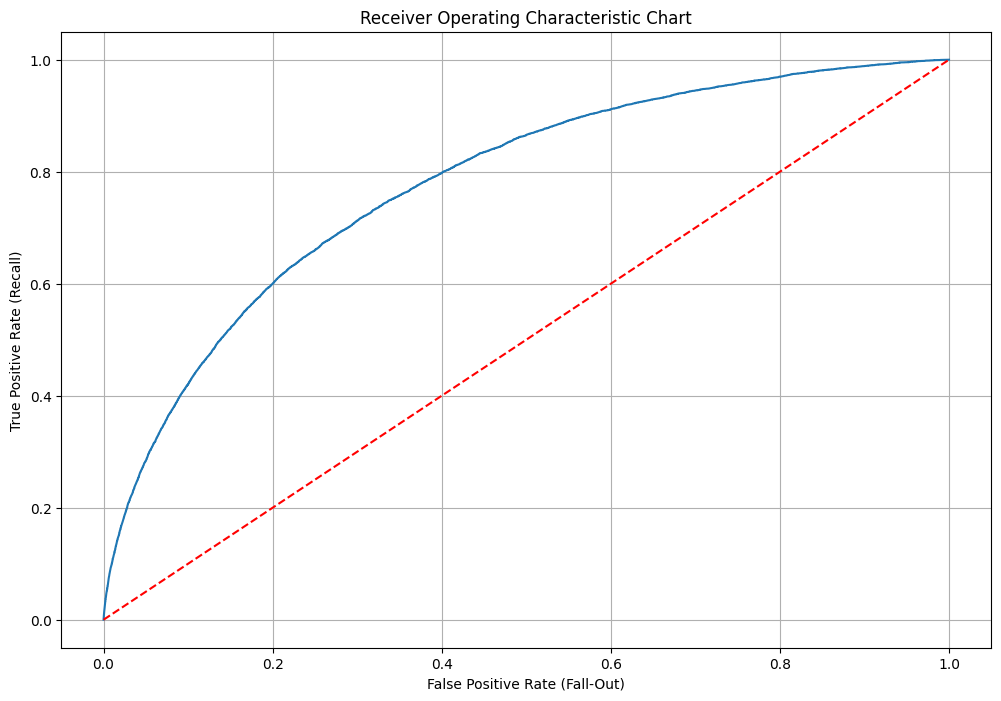

In [24]:
print(classification_report(result_valid['delayed'], result_valid['predict']))

fpr, tpr, thresholds = roc_curve(result_valid['delayed'], result_valid['delayed_prob'])

print(auc(fpr, tpr))


plt.figure(figsize=(12, 8))

plt.plot(fpr, tpr)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])


plt.plot([0, 1], [0, 1], 'r--', label="random guess")


plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic Chart')
plt.savefig('ROC_Curve')
plt.show()